# In this assignment, we will implement **convolution neural network** that will perform binary classification on a set of images of Cat and Dog.

Before startig the assignment, we will have to upload the images that we will classify.

## **Importing the Dataset**
**Step 1** :Here I have used **Kaggle API** to upload the data in google colab using **kaggle json** file. As its a huge dataset so by uploading from own device it may take more time.Hence this one is a better way to proceed.

**Important** : use your kaggle API and use Kaggle Json from below given data set to get the data, as it has 1GB of size

In [ ]:
# Dataset - https://www.kaggle.com/datasets/salader/dogs-vs-cats

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [ ]:
!kaggle datasets download -d salader/dogs-vs-cats

As the data is in zip format so we will use unzip library to extract the data efficiently

In [ ]:
import zipfile
zip_ref = zipfile.ZipFile('/content/dogs-vs-cats.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

#**Import necessary Libraries**

In [ ]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,BatchNormalization,Dropout

## **Preprocessing the dataset**

Before we begin working with the neural network, we need to make sure our data  is in a format that neural networks can work with.

First, we create a `train_data` collection of images for training the neural network, and another collection `test_data` that will then be used to check the accuracy of the trained neural network. We do this by taking slices of the total data and concatenating them.

**Due to huge ammount of data using all the data at a time to train the model will take more time as RAM is small**

[Generators from Keras](https://stanford.edu/~shervine/blog/keras-how-to-generate-data-on-the-fly)

In [ ]:
# Here we use concept of generators to handle large amount of data as
# it divides the data set into Batches so at a time one batch is used
# for training purpose

train_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/train',
    labels='inferred',
    label_mode = 'int',
    batch_size=32,
    image_size=(256,256)
)

validation_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/test',
    labels='inferred',
    label_mode = 'int',
    batch_size=32,
    image_size=(256,256)
)

# Normalization

In [ ]:
# Now we Normalize the pixel values of images to a standard range  [0, 1]
# this helps the model converge faster during training
def process(image,label):
    image = tf.cast(image/255. ,tf.float32)
    return image,label

train_ds = train_ds.map(process)
validation_ds = validation_ds.map(process)

##**Building the Convolutional Neural Network**

Now, we will start making the actual neural network.

First, initialise the hyperparameters of the neural network.  
Here, we are going to make a 3 Convolutional layer  (i.e., 1st layer 32 filters, 2nd layer 64 filters and 3rd layer have 128 filters )

In [ ]:
# 3 layer CNN model

model = Sequential()

model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(128,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

# Now we add Flatten layer
model.add(Flatten())

# Now we add Fully Connected layer
# We are going to use `ReLU` functions as activation functions for the input and
# the first hidden layer and `Sigmoid` function for the final output, as we want
# an output between 0 and 1.
model.add(Dense(128,activation='relu'))
model.add(Dense(64,activation='relu'))

model.add(Dense(1,activation='sigmoid')) #output

In [ ]:
model.summary()

Now in Our model we have **14847297 parameters**

In [ ]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
# training our Model, here I have taken epoch as 10 that we can increase
history = model.fit(train_ds,epochs=10,validation_data=validation_ds)#

Epoch 1/10
625/625 [==============================] - 61s 85ms/step - loss: 0.6218 - accuracy: 0.6450 - val_loss: 0.5172 - val_accuracy: 0.7512
Epoch 2/10
625/625 [==============================] - 53s 83ms/step - loss: 0.4956 - accuracy: 0.7581 - val_loss: 0.4831 - val_accuracy: 0.7792
Epoch 3/10
625/625 [==============================] - 57s 91ms/step - loss: 0.3834 - accuracy: 0.8262 - val_loss: 0.4629 - val_accuracy: 0.8086
Epoch 4/10
625/625 [==============================] - 53s 85ms/step - loss: 0.2507 - accuracy: 0.8951 - val_loss: 0.6032 - val_accuracy: 0.7986
Epoch 5/10
625/625 [==============================] - 53s 84ms/step - loss: 0.1292 - accuracy: 0.9495 - val_loss: 0.8137 - val_accuracy: 0.8002
Epoch 6/10
625/625 [==============================] - 52s 82ms/step - loss: 0.0757 - accuracy: 0.9733 - val_loss: 0.9869 - val_accuracy: 0.7934
Epoch 7/10
625/625 [==============================] - 55s 88ms/step - loss: 0.0582 - accuracy: 0.9807 - val_loss: 1.1708 - val_accuracy:

# Model Performance
On Train and Validation DATA

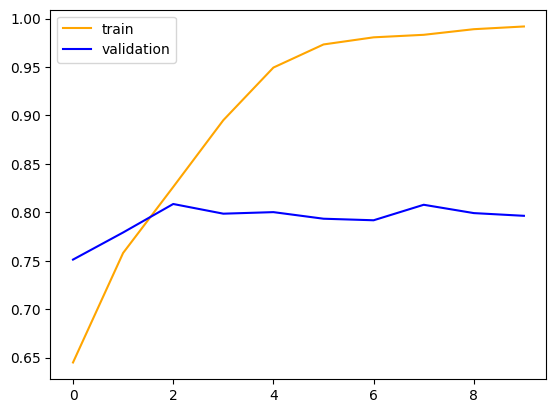

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'],color='orange',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

**As we can see that our model is performing well on train data but not performing well on Validation Data that indicates that there is overfitting oucrring**

Loss Minimization

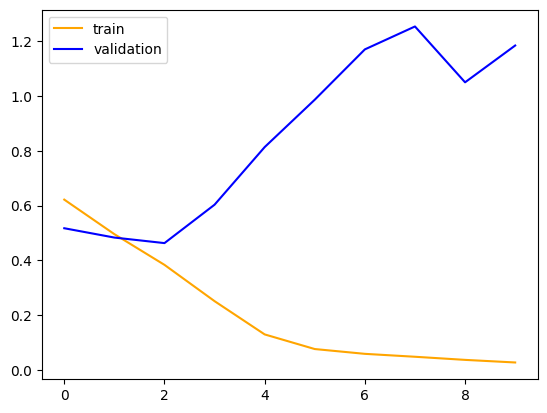

In [ ]:
plt.plot(history.history['loss'],color='orange',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

# Model 2

Now to overcome the above problem and to increase the validation accuracy, there are some methods to handle the overfitting problem

These are the ways to deal with overfitting problem :
1. Data Augmentation
2. L1/L2 Regularizer
3. Dropout


##**Building New Convolutional Neural Network**

In [ ]:
#Here I have added the batch Normalization and Dropout

model = Sequential()

model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(128,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Flatten())

model.add(Dense(128,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(1,activation='sigmoid'))

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 254, 254, 32)      896       
                                                                 
 batch_normalization (Batch  (None, 254, 254, 32)      128       
 Normalization)                                                  
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 127, 127, 32)      0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 batch_normalization_1 (Bat  (None, 125, 125, 64)      256       
 chNormalization)                                                
                                                      

In [ ]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
history = model.fit(train_ds,epochs=10,validation_data=validation_ds)#

Epoch 1/10
625/625 [==============================] - 68s 103ms/step - loss: 1.3444 - accuracy: 0.5783 - val_loss: 0.6348 - val_accuracy: 0.6428
Epoch 2/10
625/625 [==============================] - 64s 102ms/step - loss: 0.6311 - accuracy: 0.6649 - val_loss: 0.5844 - val_accuracy: 0.7006
Epoch 3/10
625/625 [==============================] - 67s 107ms/step - loss: 0.5278 - accuracy: 0.7419 - val_loss: 0.5135 - val_accuracy: 0.7536
Epoch 4/10
625/625 [==============================] - 67s 106ms/step - loss: 0.4491 - accuracy: 0.7870 - val_loss: 0.4991 - val_accuracy: 0.7742
Epoch 5/10
625/625 [==============================] - 65s 104ms/step - loss: 0.3949 - accuracy: 0.8251 - val_loss: 0.4390 - val_accuracy: 0.7734
Epoch 6/10
625/625 [==============================] - 65s 103ms/step - loss: 0.3291 - accuracy: 0.8565 - val_loss: 0.4151 - val_accuracy: 0.8152
Epoch 7/10
625/625 [==============================] - 68s 108ms/step - loss: 0.2580 - accuracy: 0.8909 - val_loss: 0.6323 - val_ac

# Model Performance
On Train and Validation DATA

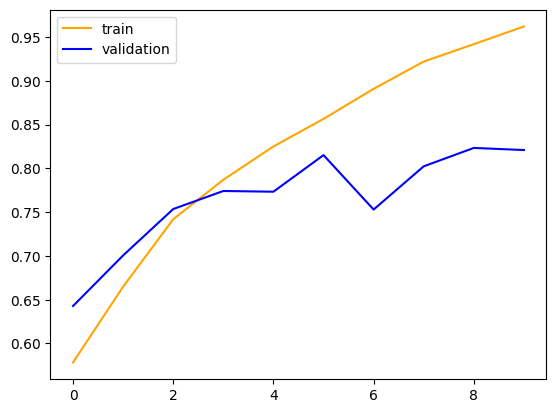

In [ ]:
plt.plot(history.history['accuracy'],color='orange',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

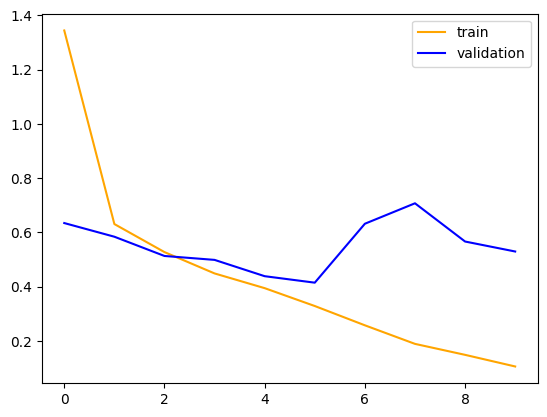

In [ ]:
plt.plot(history.history['loss'],color='orange',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

# Conclusion :
As we can see from both Model’s accuracy plot, Model 2 has performed better as its validation accuracy is increases with each epoch and the gap between Training accuracy and Validation accuracy has reduced.

# **Q4**
What will you do to make your model smaller and faster during inference (for mobile real time applications)?


As mentioned previously, we can fine tune our model by Data Augmentation
putting L1/L2 Regularization, Identify and remove redundant or less important parameters from the model, reducing its size while maintaining performance. Apart from that we can use transferlearning and pre trained model to enhance our accuracy.
